In [1]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

In [2]:
from keras.applications.imagenet_utils import decode_predictions

from efficientnet import EfficientNetB3 as Net
from efficientnet import center_crop_and_resize, preprocess_input

Using TensorFlow backend.


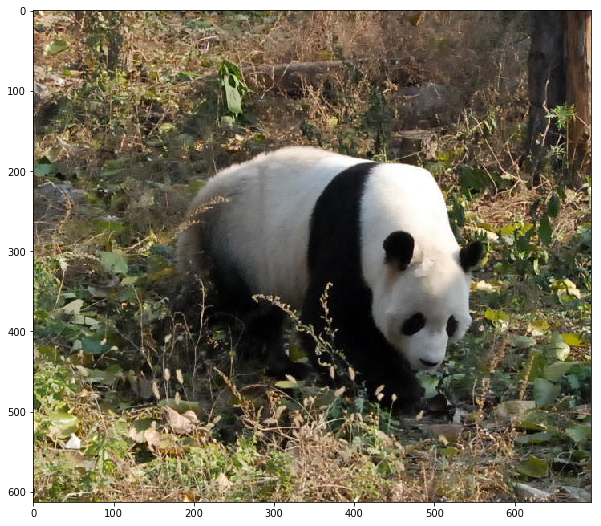

In [3]:
# test image
image = imread('../misc/panda.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [4]:
# loading pretrained model
model = Net(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

[[('n02510455', 'giant_panda', 0.8167188),
  ('n02509815', 'lesser_panda', 0.0049959784),
  ('n02133161', 'American_black_bear', 0.0017421696),
  ('n02134084', 'ice_bear', 0.0014180903),
  ('n02132136', 'brown_bear', 0.0011108501)]]

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 40) 1080        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 150, 150, 40) 160         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 150, 150, 40) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
depthwise_

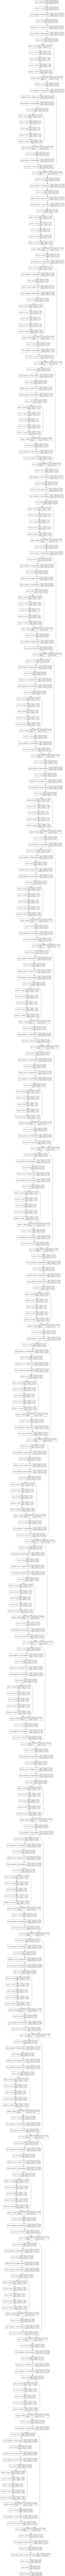

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png') 


In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

data = model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')
with open('model.svg', 'wb') as f:
    f.write(data)